In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# **Trading Strategy**

In [4]:
# 1. Load the trained LSTM model
model = load_model('/content/lstm_model.keras')

In [5]:
tesla_data = pd.read_csv('/content/TSLA_historical_data.csv')
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.set_index('Date', inplace=True)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tesla_data['Close'].values.reshape(-1, 1))

In [10]:
seq_length = 30

# Function to create sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Step 5: Inverse transform to get back to the original scale
forecast = np.array(forecast).reshape(-1, 1)
forecast_prices = scaler.inverse_transform(forecast)


In [11]:
# Step 5: Forecast Future Data
# Predict the next 180 days (6 months) of Tesla stock prices
forecast_length = 180  # Forecasting for the next 6 months

# We need to use the last 'seq_length' data points to predict the future
input_seq = scaled_data[-seq_length:].reshape((1, seq_length, 1))

# Generate future predictions
future_predictions = []
for _ in range(forecast_length):
    pred = model.predict(input_seq)
    future_predictions.append(pred[0, 0])
    # Append the prediction to the sequence for the next prediction
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

In [12]:
# Step 6: Reverse the Scaling of Predictions
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

In [14]:
# Step 7: Prepare the Future Dates
last_date = tesla_data.index[-1]
date_range = pd.date_range(last_date, periods=forecast_length + 1, freq='B')[1:]  # Business days for the forecast


In [15]:
# Step 8: Create a DataFrame for the Forecasts
forecast_df = pd.DataFrame(future_predictions, columns=['Forecast'], index=date_range)


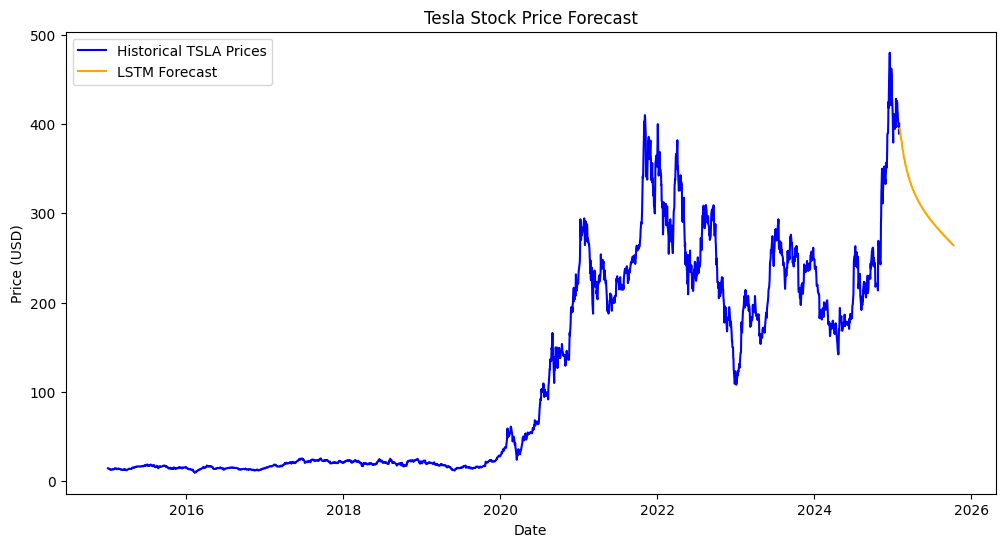

In [17]:
# Step 9: Visualize the Forecast and Historical Data
plt.figure(figsize=(12, 6))
plt.plot(tesla_data.index, tesla_data['Close'], label='Historical TSLA Prices', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='LSTM Forecast', color='orange')
plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [18]:
# Step 10: Analyze the Forecast
# Trend Analysis: Look for trends (upward, downward, stable)
forecast_trend = "Upward" if forecast_df['Forecast'].iloc[-1] > forecast_df['Forecast'].iloc[0] else "Downward"
print(f"Trend Analysis: The forecast suggests a {forecast_trend} trend.")

Trend Analysis: The forecast suggests a Downward trend.


In [19]:
# Volatility and Risk: Discuss the level of uncertainty captured by the confidence intervals
# Since confidence intervals are not implemented, we discuss the volatility in terms of standard deviation
forecast_volatility = np.std(future_predictions)
print(f"Volatility and Risk: The forecast volatility (standard deviation) is {forecast_volatility:.2f}.")


Volatility and Risk: The forecast volatility (standard deviation) is 33.03.


In [20]:
# Market Opportunities and Risks: Insights based on the forecasted trends
if forecast_trend == "Upward":
    market_opportunity = "Potential price increases, favorable for buying."
else:
    market_opportunity = "Potential price declines, risk of loss."
print(f"Market Opportunities and Risks: {market_opportunity}")

Market Opportunities and Risks: Potential price declines, risk of loss.
